In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [27]:
import seaborn as sns

In [7]:
df = pd.read_csv('vgsales.csv')

In [8]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Best Genre Game Analysis ###

In [18]:
year_column = df['Genre'].drop_duplicates()
print(year_column)


0            Sports
1          Platform
2            Racing
4      Role-Playing
5            Puzzle
7              Misc
9           Shooter
10       Simulation
16           Action
39         Fighting
50        Adventure
165        Strategy
Name: Genre, dtype: object


In [180]:
df['Year'] = df['Year'].astype(str)
df['new_year'] = df['Year'].str[0:4]
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales new_year  
0     41.49     29.02      3.77         8.46         82.74     2006  
1     29.08      3.58      6.81         0.77         40.24     1985  
2     15.85     12.88      3.79         3.31         35.82     2008  
3     15.75     11.01      3.28         2.96         33.00     2009  
4     11.27      8.89     10.22         1.00         31.37     1996  


In [208]:
highest_global_sales = df.sort_values('Global_Sales', ascending=False)
result = highest_global_sales[['new_year','Name' ,'Global_Sales']]
top30 = result.head(100)
print(top30.to_string(index=False))

new_year                                         Name  Global_Sales
    2006                                   Wii Sports         82.74
    1985                            Super Mario Bros.         40.24
    2008                               Mario Kart Wii         35.82
    2009                            Wii Sports Resort         33.00
    1996                     Pokemon Red/Pokemon Blue         31.37
    1989                                       Tetris         30.26
    2006                        New Super Mario Bros.         30.01
    2006                                     Wii Play         29.02
    2009                    New Super Mario Bros. Wii         28.62
    1984                                    Duck Hunt         28.31
    2005                                   Nintendogs         24.76
    2005                                Mario Kart DS         23.42
    1999                  Pokemon Gold/Pokemon Silver         23.10
    2007                                      Wi

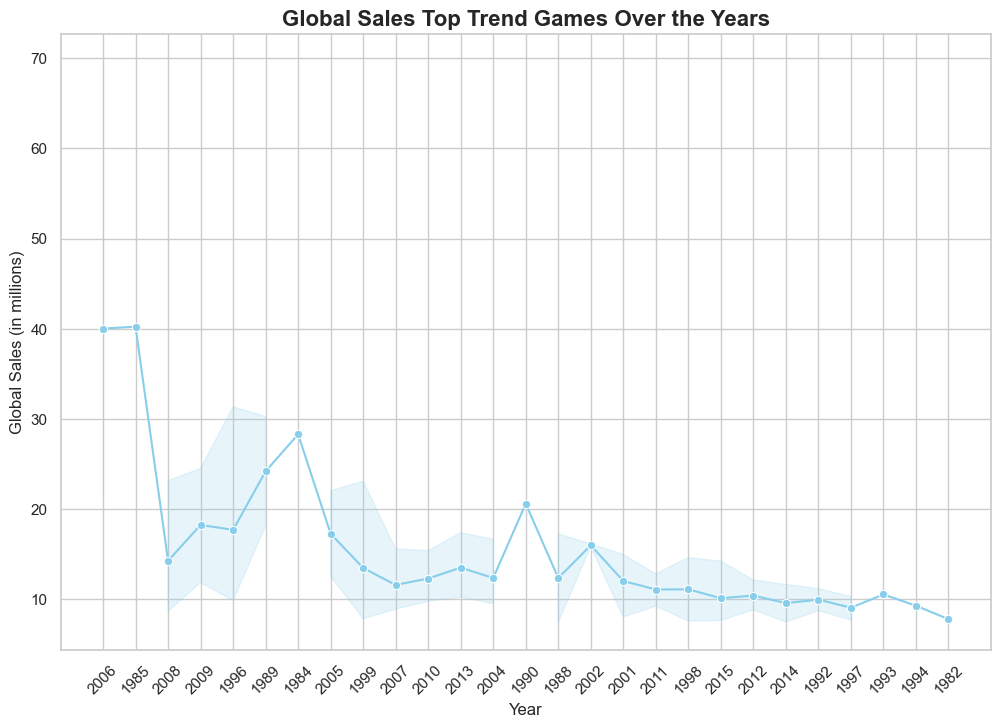

In [209]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.lineplot(data=top30, x='new_year', y='Global_Sales', marker='o', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales Top Trend Games Over the Years', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [210]:
highest_global_sales = df.sort_values('Global_Sales', ascending=False)
result = highest_global_sales[['new_year','Name' ,'Global_Sales']]
top30 = result.head(10)
print(top30.to_string(index=False))

new_year                      Name  Global_Sales
    2006                Wii Sports         82.74
    1985         Super Mario Bros.         40.24
    2008            Mario Kart Wii         35.82
    2009         Wii Sports Resort         33.00
    1996  Pokemon Red/Pokemon Blue         31.37
    1989                    Tetris         30.26
    2006     New Super Mario Bros.         30.01
    2006                  Wii Play         29.02
    2009 New Super Mario Bros. Wii         28.62
    1984                 Duck Hunt         28.31


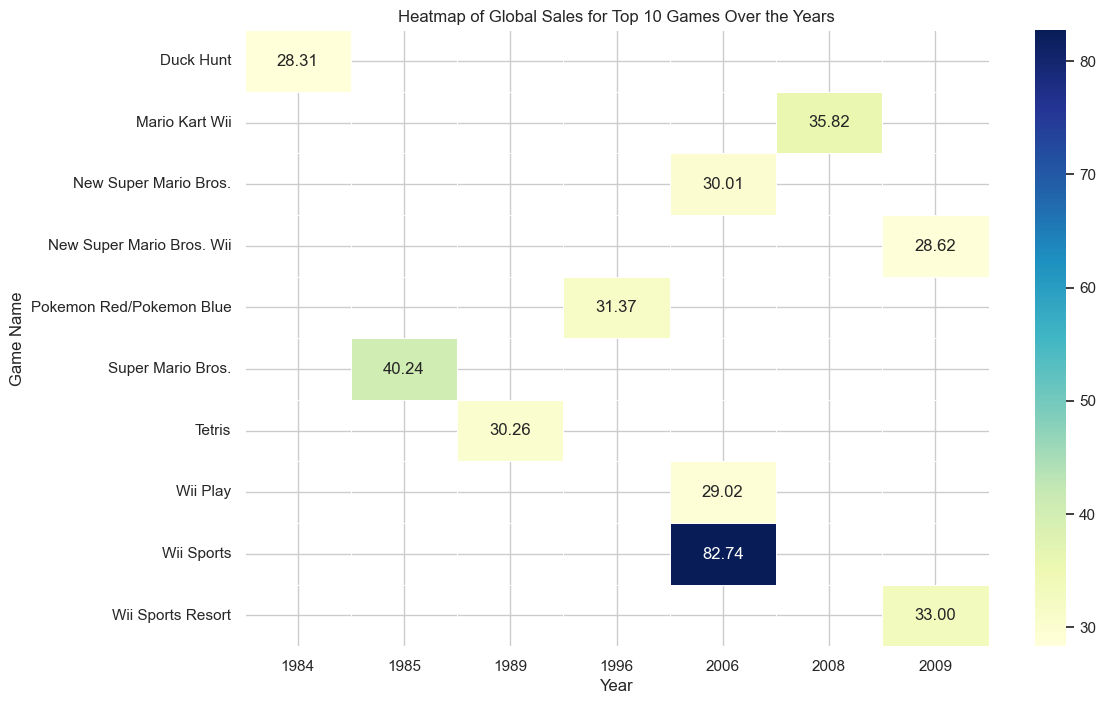

In [211]:
heatmap_data = top30.pivot(index='Name', columns='new_year', values='Global_Sales')
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid") SS
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.xlabel('Year')
plt.ylabel('Game Name')
plt.title('Heatmap of Global Sales for Top 10 Games Over the Years')

plt.show()

In [104]:
total_publisher_sales = df.groupby('Publisher')['Global_Sales'].sum()
total_publisher_sales_sorted = total_publisher_sales.sort_values(ascending=False)
top30 = total_publisher_sales_sorted.head(30)
print(top30.to_string(index=False))

Publisher
1786.56
1110.32
 727.46
 607.50
 474.72
 399.54
 340.77
 283.64
 272.99
 254.09
 245.79
 200.89
 157.22
 153.89
 145.18
 119.96
  98.98
  87.34
  82.14
  69.85
  64.14
  58.21
  57.65
  55.91
  53.55
  47.87
  43.87
  34.66
  33.74
  25.67


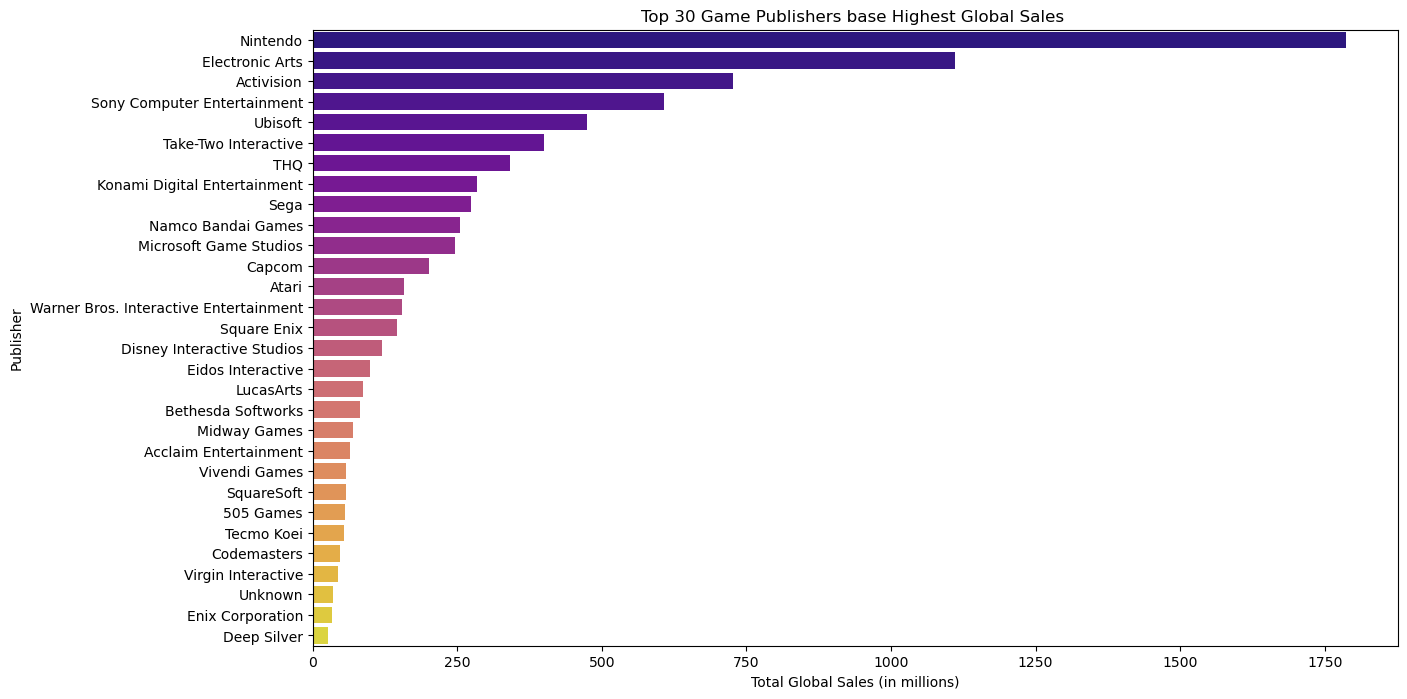

In [177]:
plt.figure(figsize=(14, 8))
sns.barplot(x=top30.values, y=top30.index, palette='plasma')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Publisher')
plt.title('Top 30 Game Publishers base Highest Global Sales ')

plt.show()

In [ ]:
total_publisher_sales = df.groupby('Publisher')['Global_Sales'].sum()
total_publisher_sales_sorted = total_publisher_sales.sort_values(ascending=False)
top30 = total_publisher_sales_sorted.head(30)
print(top30.to_string(index=False)

In [83]:
game_publisher = df['Publisher'].drop_duplicates()
print(game_publisher.head(50))

0                                    Nintendo
15                     Microsoft Game Studios
16                       Take-Two Interactive
28                Sony Computer Entertainment
29                                 Activision
60                                    Ubisoft
75                         Bethesda Softworks
77                            Electronic Arts
85                                       Sega
87                                 SquareSoft
89                                      Atari
117                                 505 Games
136                                    Capcom
138                            GT Interactive
142              Konami Digital Entertainment
146        Sony Computer Entertainment Europe
147                               Square Enix
150                                 LucasArts
151                        Virgin Interactive
159    Warner Bros. Interactive Entertainment
167                     Universal Interactive
178                         Eidos 

In [174]:
sports = df[df['Genre'] == 'Platform']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                     Name  Global_Sales
        Super Mario Bros.         40.24
    New Super Mario Bros.         30.01
New Super Mario Bros. Wii         28.62
        Super Mario World         20.61
         Super Mario Land         18.14
      Super Mario Bros. 3         17.28
           Super Mario 64         11.89
       Super Mario Galaxy         11.52
      Super Mario 3D Land         10.79
    Super Mario All-Stars         10.55


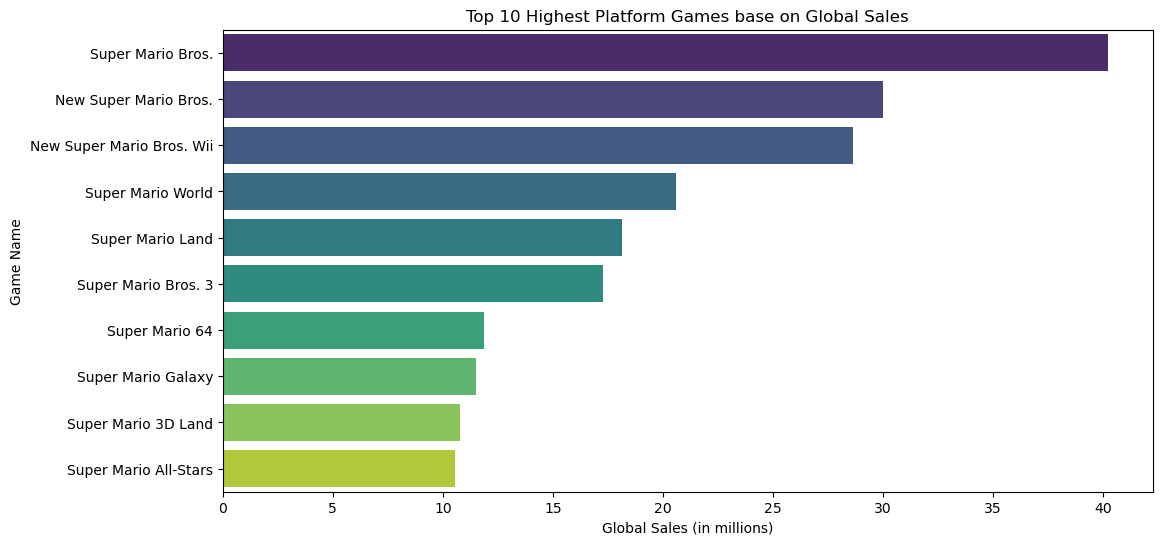

In [175]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Platform Games base on Global Sales')

plt.show()

In [172]:
sports = df[df['Genre'] == 'Sports']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Year','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                              Name   Year  Global_Sales
                        Wii Sports 2006.0         82.74
                 Wii Sports Resort 2009.0         33.00
                           Wii Fit 2007.0         22.72
                      Wii Fit Plus 2009.0         22.00
                           FIFA 16 2015.0          8.49
Mario & Sonic at the Olympic Games 2007.0          8.06
                           FIFA 14 2013.0          6.90
                     Zumba Fitness 2010.0          6.81
                           FIFA 12 2011.0          6.69
                           FIFA 15 2014.0          6.59


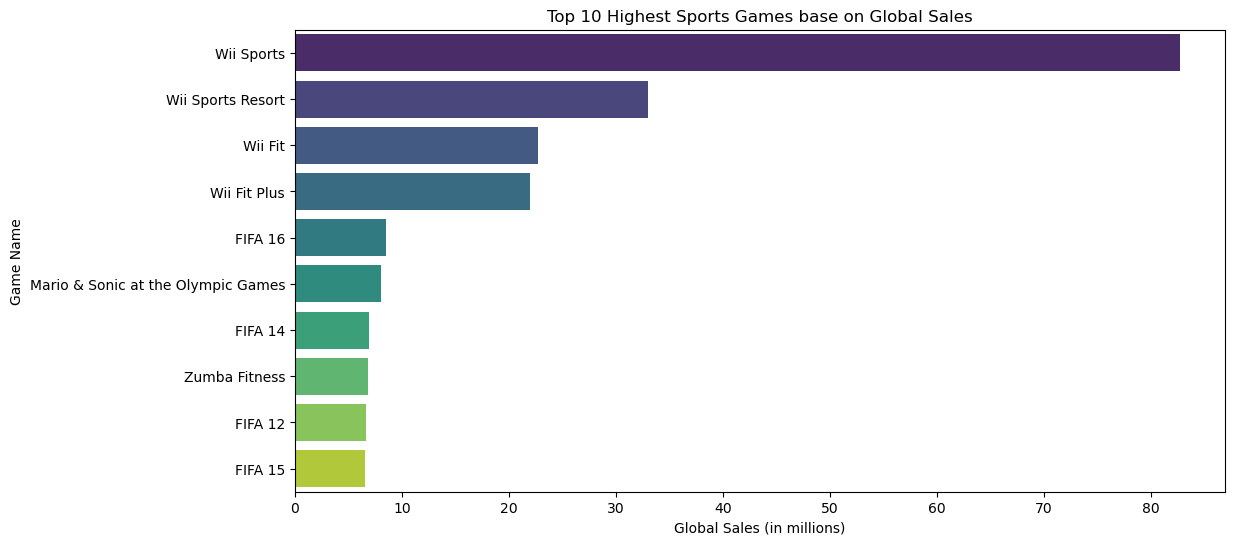

In [173]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Sports Games base on Global Sales')

plt.show()

In [170]:
sports = df[df['Genre'] == 'Racing']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                  Name  Global_Sales
        Mario Kart Wii         35.82
         Mario Kart DS         23.42
Gran Turismo 3: A-Spec         14.98
          Mario Kart 7         12.21
        Gran Turismo 4         11.66
          Gran Turismo         10.95
        Gran Turismo 5         10.77
         Mario Kart 64          9.87
        Gran Turismo 2          9.49
      Super Mario Kart          8.76


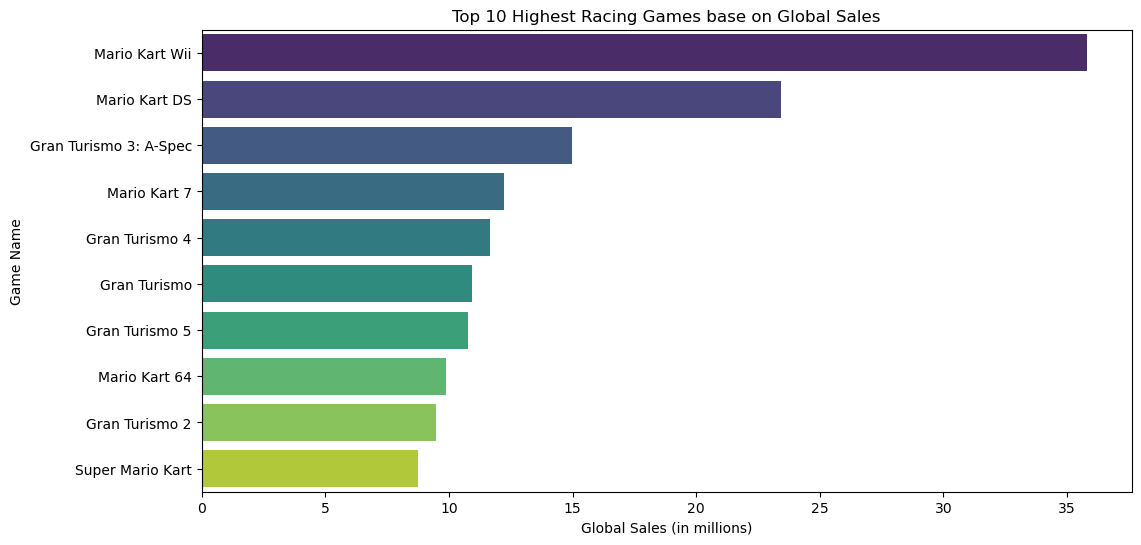

In [171]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Racing Games base on Global Sales')

plt.show()

In [61]:
sports = df[df['Genre'] == 'Role-Playing']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                                     Name  Global_Sales
                 Pokemon Red/Pokemon Blue         31.37
              Pokemon Gold/Pokemon Silver         23.10
            Pokemon Diamond/Pokemon Pearl         18.36
            Pokemon Ruby/Pokemon Sapphire         15.85
              Pokemon Black/Pokemon White         15.32
  Pokémon Yellow: Special Pikachu Edition         14.64
                      Pokemon X/Pokemon Y         14.35
Pokemon Omega Ruby/Pokemon Alpha Sapphire         11.33
        Pokemon FireRed/Pokemon LeafGreen         10.49
                        Final Fantasy VII          9.72


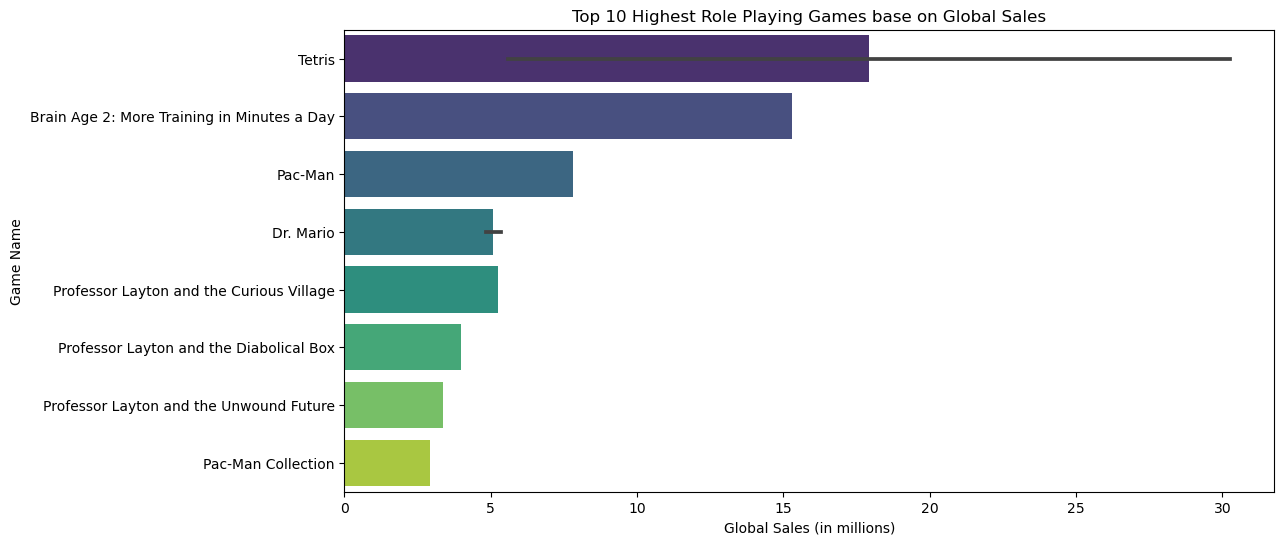

In [168]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Role Playing Games base on Global Sales')

plt.show()

In [169]:
sports = df[df['Genre'] == 'Puzzle']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                                       Name  Global_Sales
                                     Tetris         30.26
Brain Age 2: More Training in Minutes a Day         15.30
                                    Pac-Man          7.81
                                     Tetris          5.58
                                  Dr. Mario          5.34
   Professor Layton and the Curious Village          5.26
                                  Dr. Mario          4.85
    Professor Layton and the Diabolical Box          4.00
    Professor Layton and the Unwound Future          3.36
                         Pac-Man Collection          2.94


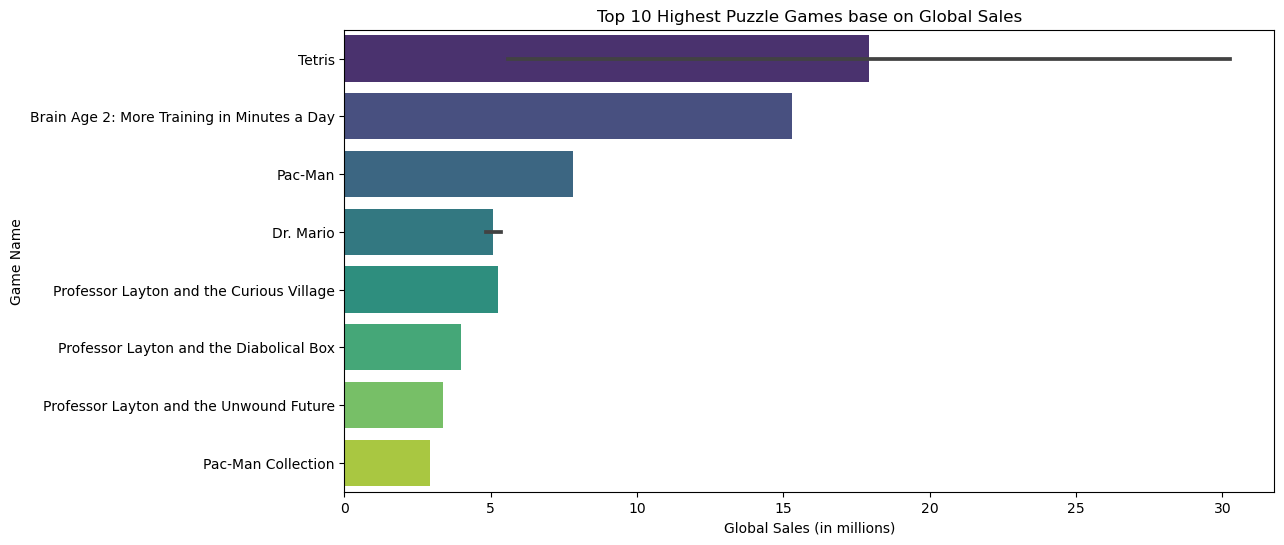

In [167]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Puzzle Games base on Global Sales')

plt.show()

In [164]:
sports = df[df['Genre'] == 'Misc']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                                        Name  Global_Sales
                                    Wii Play         29.02
                          Kinect Adventures!         21.82
Brain Age: Train Your Brain in Minutes a Day         20.22
                                Just Dance 3         10.26
                                Just Dance 2          9.52
                                   Minecraft          9.20
                              Mario Party DS          9.02
                                   Wii Party          8.49
                               Mario Party 8          8.42
                                  Just Dance          7.27


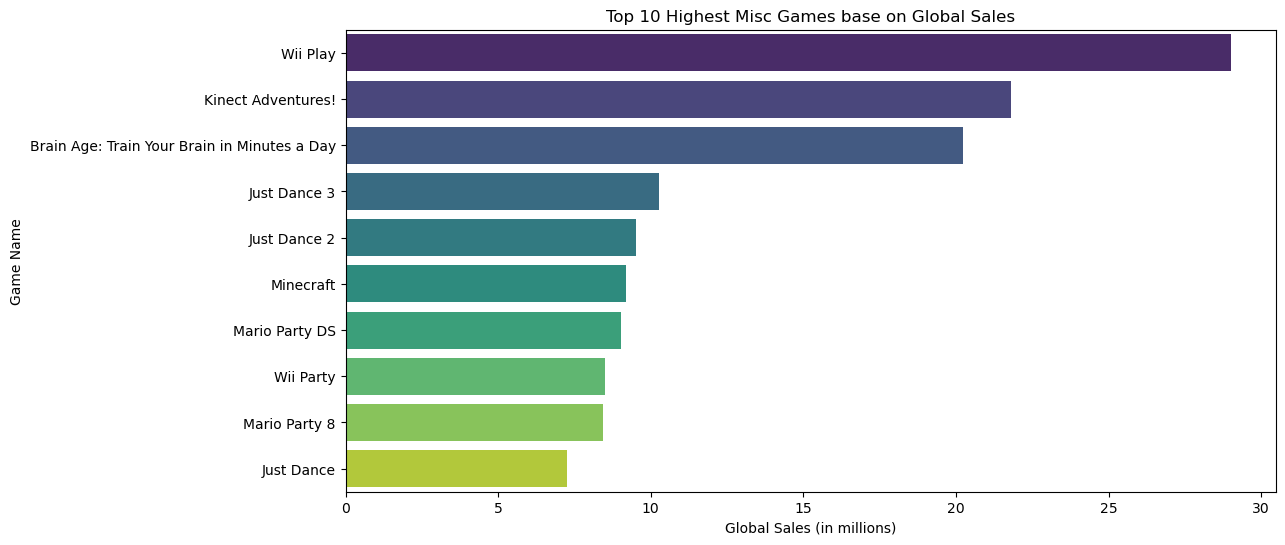

In [165]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Misc Games base on Global Sales')

plt.show()

In [162]:
sports = df[df['Genre'] == 'Shooter']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                          Name  Global_Sales
                     Duck Hunt         28.31
Call of Duty: Modern Warfare 3         14.76
       Call of Duty: Black Ops         14.64
     Call of Duty: Black Ops 3         14.24
    Call of Duty: Black Ops II         14.03
    Call of Duty: Black Ops II         13.73
Call of Duty: Modern Warfare 2         13.51
Call of Duty: Modern Warfare 3         13.46
       Call of Duty: Black Ops         12.73
                        Halo 3         12.14


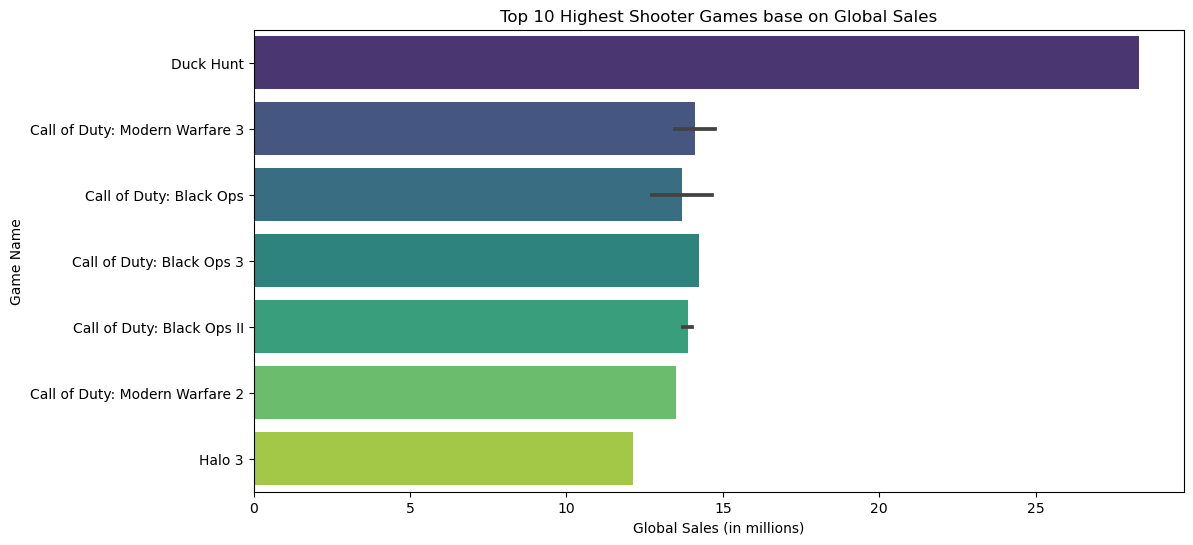

In [163]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Shooter Games base on Global Sales')

plt.show()

In [160]:
sports = df[df['Genre'] == 'Simulation']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                       Name  Global_Sales
                 Nintendogs         24.76
Animal Crossing: Wild World         12.27
  Animal Crossing: New Leaf          9.09
                 The Sims 3          8.11
               Cooking Mama          5.72
             Tomodachi Life          5.15
 Microsoft Flight Simulator          5.12
 Animal Crossing: City Folk          4.68
          Nintendogs + cats          3.81
        The Sims: Unleashed          3.76


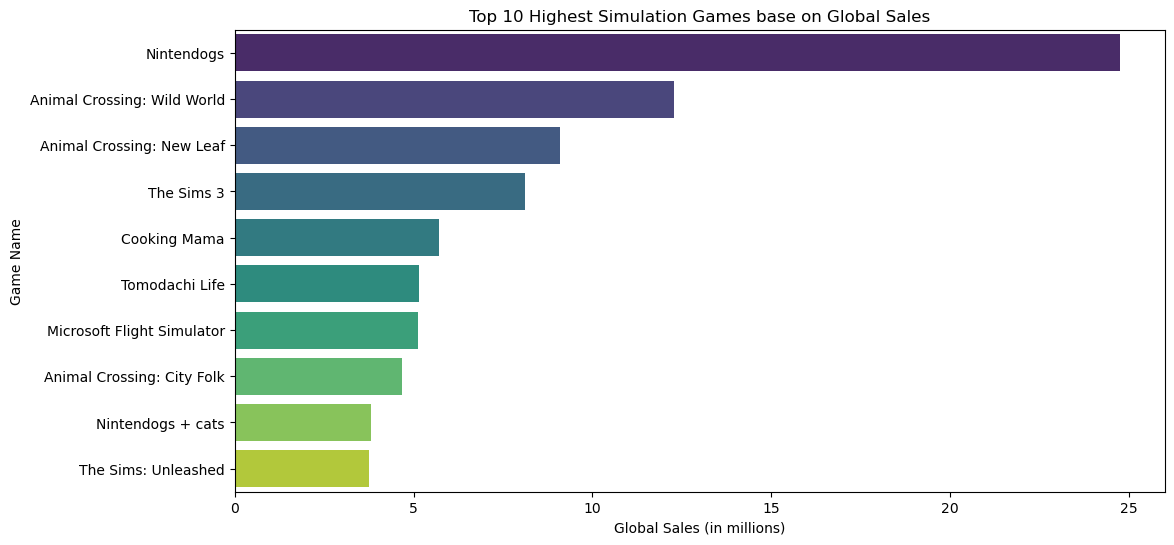

In [161]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Simulation Games base on Global Sales')

plt.show()

In [158]:
sports = df[df['Genre'] == 'Action']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                                Name  Global_Sales
                  Grand Theft Auto V         21.40
       Grand Theft Auto: San Andreas         20.81
                  Grand Theft Auto V         16.38
         Grand Theft Auto: Vice City         16.15
                Grand Theft Auto III         13.10
                  Grand Theft Auto V         11.98
Pokemon HeartGold/Pokemon SoulSilver         11.90
                 Grand Theft Auto IV         11.02
                 Grand Theft Auto IV         10.57
                      FIFA Soccer 13          8.24


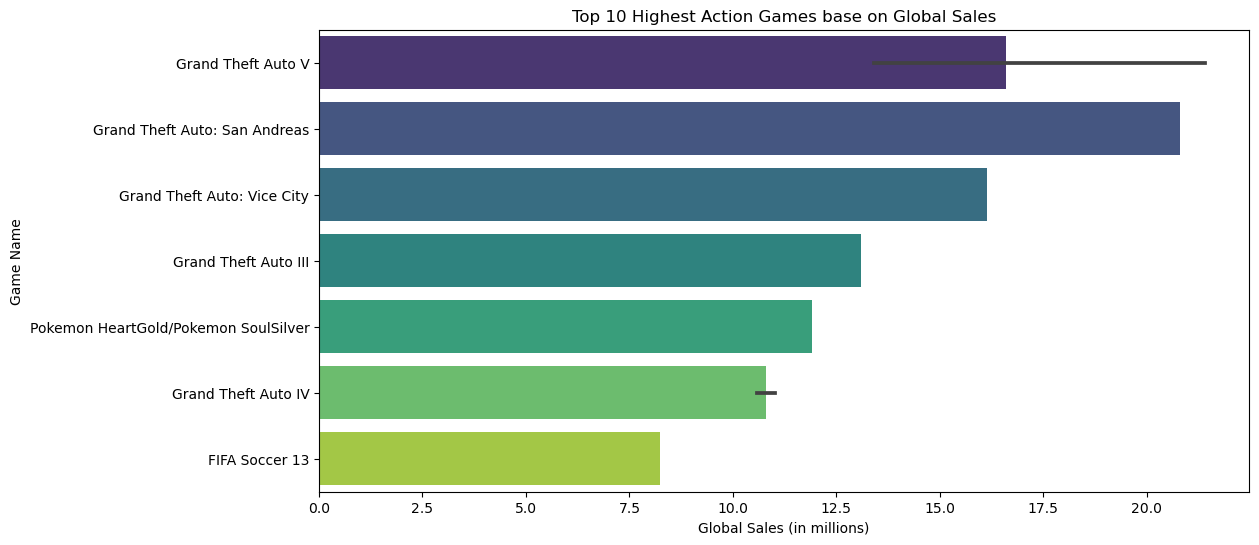

In [159]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Action Games base on Global Sales')

plt.show()

In [155]:
sports = df[df['Genre'] == 'Fighting']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                                Name  Global_Sales
             Super Smash Bros. Brawl         13.04
 Super Smash Bros. for Wii U and 3DS          7.45
                            Tekken 3          7.16
             Super Smash Bros. Melee          7.07
Street Fighter II: The World Warrior          6.30
                            Tekken 2          5.74
                   Super Smash Bros.          5.55
 Super Smash Bros. for Wii U and 3DS          5.02
                   Street Fighter IV          4.19
             Street Fighter II Turbo          4.10


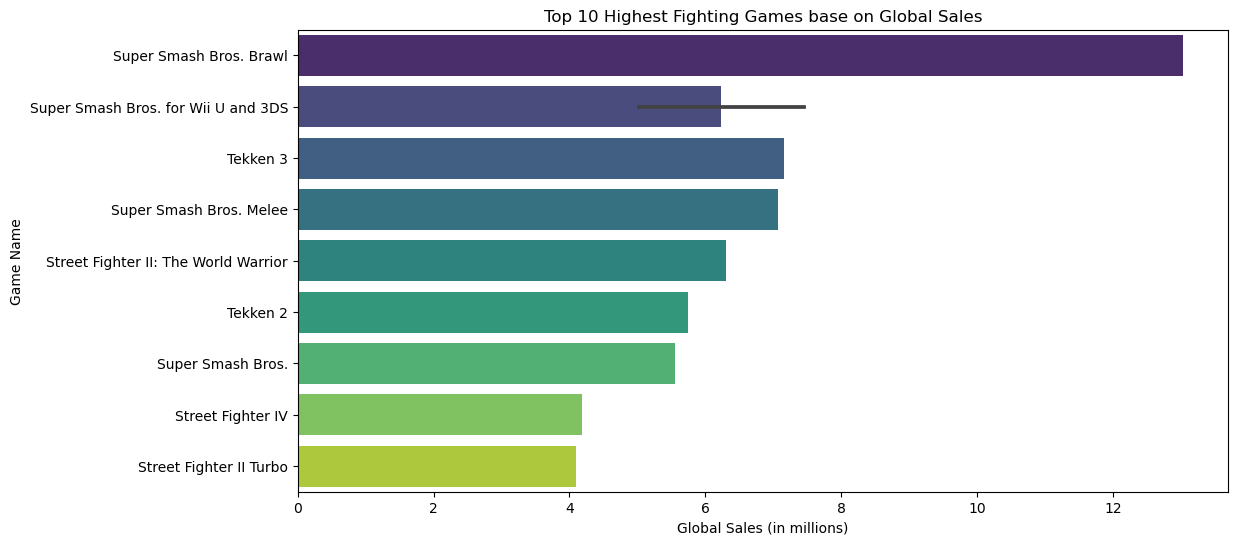

In [156]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Fighting Games base on Global Sales')

plt.show()

In [153]:
sports = df[df['Genre'] == 'Adventure']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                              Name  Global_Sales
Super Mario Land 2: 6 Golden Coins         11.18
                  Assassin's Creed          5.55
                  Assassin's Creed          4.83
   Zelda II: The Adventure of Link          4.38
        Rugrats: Search For Reptar          3.34
                        L.A. Noire          3.23
 Club Penguin: Elite Penguin Force          3.16
                        Heavy Rain          3.12
                              Myst          2.81
                        L.A. Noire          2.72


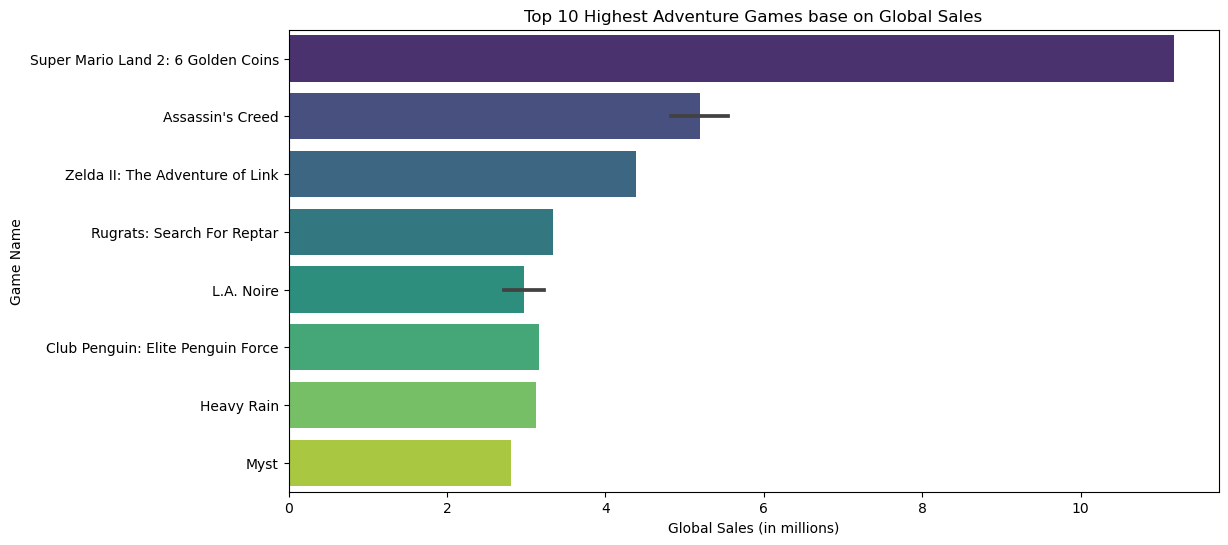

In [154]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Adventure Games base on Global Sales')

plt.show()

In [151]:
sports = df[df['Genre'] == 'Strategy']
sales = sports.sort_values('Global_Sales',ascending=False)
result = sales[['Name','Global_Sales']]
top15 = result.head(10)
print(top15.to_string(index=False))

                          Name  Global_Sales
               Pokemon Stadium          5.45
                  Warzone 2100          5.01
StarCraft II: Wings of Liberty          4.83
Warcraft II: Tides of Darkness          4.21
     Pokémon Trading Card Game          3.70
  Command & Conquer: Red Alert          2.85
             Pokémon Stadium 2          2.73
                     Halo Wars          2.63
                Theme Hospital          2.40
       Warcraft: Orcs & Humans          2.08


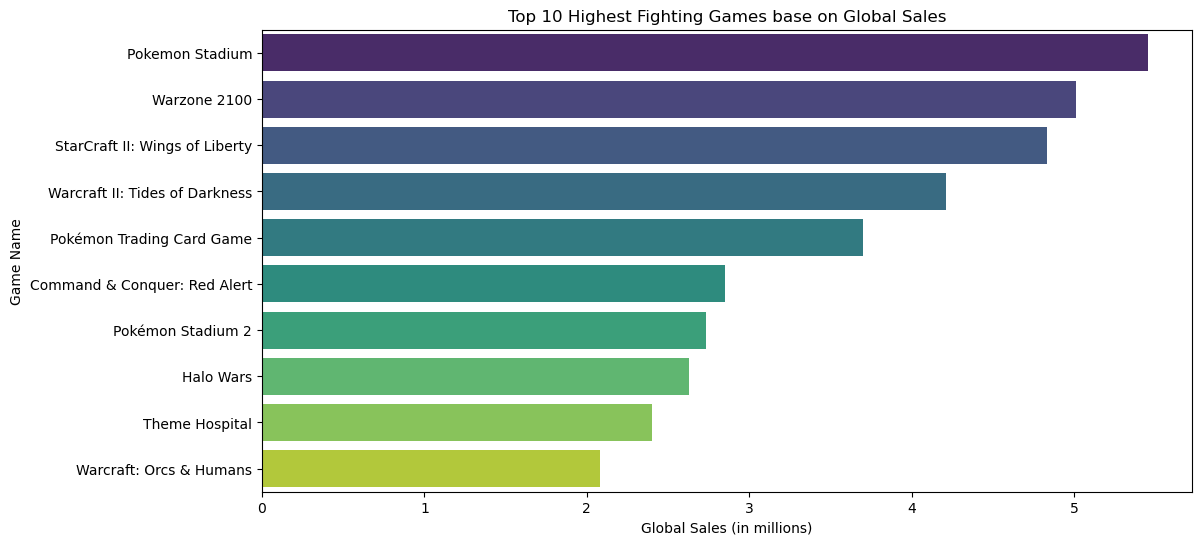

In [152]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Global_Sales', y='Name', palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest Fighting Games base on Global Sales')

plt.show()